In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [109]:
file='C:/Users/patel/Downloads/weather.csv'


In [110]:
df=pd.read_csv(file, encoding ='ascii')

In [111]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X=df.iloc[:,:4].values
y=df.iloc[:,4].values


In [114]:
#performing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1168, 4)
X_test dimension=  (293, 4)
y_train dimension=  (1168,)
y_train dimension=  (293,)


In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
#predicting for k=3
neigh = KNeighborsClassifier(n_neighbors = 3,).fit(X_train,y_train)

In [128]:
Pred_y = neigh.predict(X_test)

In [129]:
from sklearn import metrics

In [130]:
metrics.accuracy_score(y_test, Pred_y)

0.7713310580204779

In [131]:
#repeat for k=5

In [132]:
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

In [133]:
Pred_y = neigh.predict(X_test)

In [134]:
metrics.accuracy_score(y_test, Pred_y)

0.7815699658703071

In [ ]:
#TAKING weights='distance'

In [146]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.726962457337884, 0.7201365187713311, 0.7508532423208191, 0.7679180887372014, 0.7781569965870307, 0.78839590443686, 0.7815699658703071, 0.7713310580204779, 0.7781569965870307, 0.7781569965870307, 0.7747440273037542, 0.7713310580204779, 0.7542662116040956, 0.7610921501706485, 0.7508532423208191, 0.7542662116040956, 0.7508532423208191, 0.7474402730375427, 0.7508532423208191, 0.7406143344709898, 0.7508532423208191, 0.7474402730375427, 0.7474402730375427, 0.7474402730375427, 0.7474402730375427]


Text(0, 0.5, 'Testing Accuracy')

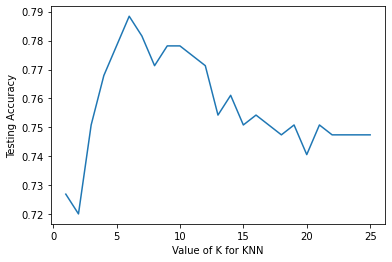

In [147]:
#plotting error graph
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [148]:
max(scores)



0.78839590443686

In [ ]:
# MAX ACCURACY FOR k=6

In [145]:
#TAKING weights='uniform'

In [149]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.726962457337884, 0.6860068259385665, 0.7713310580204779, 0.764505119453925, 0.7815699658703071, 0.7781569965870307, 0.7918088737201365, 0.7747440273037542, 0.7679180887372014, 0.7747440273037542, 0.757679180887372, 0.7610921501706485, 0.7610921501706485, 0.7542662116040956, 0.7508532423208191, 0.7508532423208191, 0.7474402730375427, 0.7440273037542662, 0.7406143344709898, 0.7508532423208191, 0.7508532423208191, 0.7508532423208191, 0.7440273037542662, 0.7508532423208191, 0.7440273037542662]


Text(0, 0.5, 'Testing Accuracy')

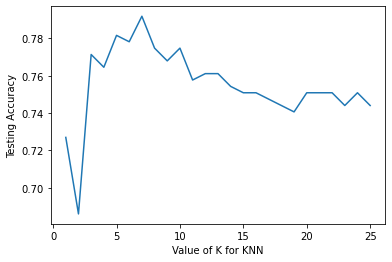

In [151]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [152]:
max(scores)

0.7918088737201365

In [153]:
# MAX ACCURACY FOR k=7

In [154]:
# HENCE, we will select model with weights='uniform' and k=7

In [156]:
neigh = KNeighborsClassifier(n_neighbors = 7, weights='uniform').fit(X_train,y_train)

In [157]:
Pred_y = neigh.predict(X_test)

In [158]:
metrics.accuracy_score(y_test, Pred_y)

0.7918088737201365

In [159]:
#plotting the confusion matrix using seaborn and sklearn 
from sklearn.metrics import confusion_matrix

In [160]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   0,   9],
       [  0,   0,   5,   0,  20],
       [  0,   0,  98,   0,  22],
       [  0,   0,   5,   0,   3],
       [  0,   0,  11,   0, 120]], dtype=int64)

In [161]:
labels=['drizzle','fog','rain','snow','sun']

<AxesSubplot:>

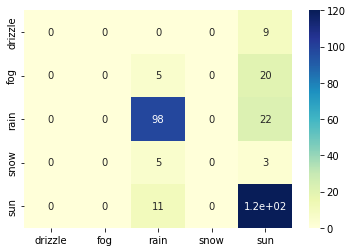

In [162]:
sb.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels,cmap='YlGnBu')